In [4]:
import numpy as np
import pandas as pd

np.random.seed(23)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class1_Sample= np.random.multivariate_normal(mu_vec1,cov_mat1,20)

df=pd.DataFrame(class1_Sample,columns=['feature1','feature2','feature3'])
df['target']=1

mu_vec2 = np.array([1,1,1])
cov_mat2 = np.array([[1,0,0],[0,1,0],[0,0,1]])
class2_Sample= np.random.multivariate_normal(mu_vec2,cov_mat2,20)

df1 = pd.DataFrame(class2_Sample,columns=['feature1','feature2','feature3'])

df1['target']=0

df=pd.concat([df,df1])

df=df.sample(40)


In [5]:
df.head()

,feature1,feature2,feature3,target
2,-0.367548,-1.137460,-1.322148,1
14,0.177061,-0.598109,1.226512,0
14,0.420623,0.411620,-0.071324,1
11,1.968435,-0.547788,-0.679418,1
12,-2.506230,0.146960,0.606195,1


In [6]:
import plotly.express as px
# y_train_trf = y_train.astype(str)
fig = px.scatter_3d(df,x=df['feature1'],y=df['feature2'],z=df['feature3'],color=df['target'].astype('str'))
fig.update_traces(marker=dict(size=12,line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))
fig.show()

c:\Users\godsc\anaconda3\Lib\site-packages\kaleido\__init__.py:14: UserWarning:




This means that static image generation (e.g. `fig.write_image()`) will not work.

Please upgrade Plotly to version 6.1.1 or greater, or downgrade Kaleido to version 0.2.1.




In [7]:
# My target is to reduce 3d data in 2d

In [8]:
# Step 1 : Apply Standard Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df.iloc[:,0:3] = scaler.fit_transform(df.iloc[:,0:3])

In [ ]:
# Step 2 : Find Covariance Matrix
covariance_matrix = np.cov([df.iloc[:,0],df.iloc[:,1],df.iloc[:,2]])
print('Covariance Matrix :\n',covariance_matrix)

Covariance Matrix :
 [[1.02564103 0.20478114 0.080118  ]
 [0.20478114 1.02564103 0.19838882]
 [0.080118   0.19838882 1.02564103]]


In [11]:
# Step 3 : Find Eigen Vector and Eigen Values
eigen_values,eigen_vectors = np.linalg.eig(covariance_matrix)

In [12]:
eigen_values

array([1.3536065 , 0.94557084, 0.77774573])

In [13]:
eigen_vectors

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442],
       [-0.52848211,  0.72025103,  0.44938304]])

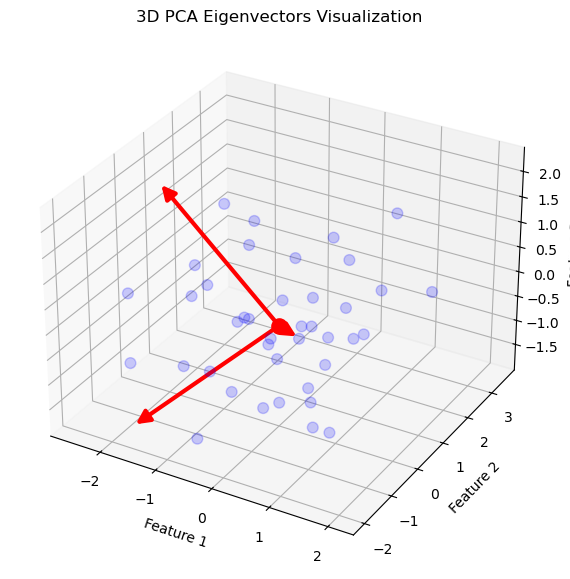

In [26]:
# %pylab inline

# from matplotlib import pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from mpl_toolkits.mplot3d import proj3d
# from matplotlib.patches import FancyArrowPatch


# class Arrow3D(FancyArrowPatch):
#     def __init__(self, xs, ys, zs, *args, **kwargs):
#         FancyArrowPatch.__init__(self, (0,0), (0,0), *args, **kwargs)
#         self._verts3d = xs, ys, zs

#     def draw(self, renderer):
#         xs3d, ys3d, zs3d = self._verts3d
#         xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)
#         self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))
#         FancyArrowPatch.draw(self, renderer)

# fig = plt.figure(figsize=(7,7))
# ax = fig.add_subplot(111, projection='3d')

# ax.plot(df['feature1'], df['feature2'], df['feature3'], 'o', markersize=8, color='blue', alpha=0.2)
# ax.plot([df['feature1'].mean()], [df['feature2'].mean()], [df['feature3'].mean()], 'o', markersize=10, color='red', alpha=0.5)
# for v in eigen_vectors.T:
#     a = Arrow3D([df['feature1'].mean(), v[0]], [df['feature2'].mean(), v[1]], [df['feature3'].mean(), v[2]], mutation_scale=20, lw=3, arrowstyle="-|>", color="r")
#     ax.add_artist(a)
# ax.set_xlabel('x_values')
# ax.set_ylabel('y_values')
# ax.set_zlabel('z_values')

# plt.title('Eigenvectors')

# plt.show()
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import proj3d
from matplotlib.patches import FancyArrowPatch

# ----------------------------------
# FIXED Arrow3D class (Matplotlib ≥3.7)
# ----------------------------------
class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0, 0), (0, 0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def draw(self, renderer):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)

# ----------------------------------
# Data (df must already exist)
# ----------------------------------
X = df[['feature1', 'feature2', 'feature3']].values

mean = X.mean(axis=0)
X_centered = X - mean

# ----------------------------------
# PCA via covariance
# ----------------------------------
cov_matrix = np.cov(X_centered.T)
eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

# Sort by importance
idx = np.argsort(eigen_values)[::-1]
eigen_vectors = eigen_vectors[:, idx]

# ----------------------------------
# Plot
# ----------------------------------
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter points
ax.scatter(
    df['feature1'],
    df['feature2'],
    df['feature3'],
    color='blue',
    alpha=0.2,
    s=60
)

# Mean point
ax.scatter(
    mean[0], mean[1], mean[2],
    color='red',
    s=120
)

# Eigenvectors
scale = 3
for i in range(3):
    v = eigen_vectors[:, i] * scale
    arrow = Arrow3D(
        [mean[0], mean[0] + v[0]],
        [mean[1], mean[1] + v[1]],
        [mean[2], mean[2] + v[2]],
        mutation_scale=20,
        lw=3,
        arrowstyle="-|>",
        color="red"
    )
    ax.add_artist(arrow)

# Labels
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Feature 3")
ax.set_title("3D PCA Eigenvectors Visualization")

plt.show()


In [16]:
pc = eigen_vectors[0:2]
pc

array([[-0.53875915, -0.69363291,  0.47813384],
       [-0.65608325, -0.01057596, -0.75461442]])

In [21]:
# To transform = uT.x(dot product)
# 40,3 . 3,2  =  40,2
transformed_df = np.dot(df.iloc[:,0:3],pc.T)

new_df = pd.DataFrame(transformed_df,columns=['PC1','PC2'])
new_df['target'] = df['target'].values
new_df.head()

,PC1,PC2,target
0,0.599433,1.795862,1
1,1.056919,-0.212737,0
2,-0.271876,0.498222,1
3,-0.621586,0.023110,1
4,1.567286,1.730967,1


In [19]:
new_df.shape

(40, 3)

In [22]:
new_df['target'] = new_df['target'].astype('str')
fig = px.scatter(x=new_df['PC1'],
                 y=new_df['PC2'],
                 color=new_df['target'],
                 color_discrete_sequence=px.colors.qualitative.G10
                )

fig.update_traces(marker=dict(size=12,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()